[Stock Price Prediction Using Python & Machine Learning](https://www.youtube.com/watch?v=QIUxPv5PJOY)




In [141]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [167]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("./drive/MyDrive/GameTheoryCourse/StockDataset/train.csv")
test_data = pd.read_csv("./drive/MyDrive/GameTheoryCourse/StockDataset/test.csv")
comparision_data = pd.read_csv("./drive/MyDrive/GameTheoryCourse/StockDataset/comparision.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
data

,Date,HIGH,TARGET
0,20090609,1002,1031
1,20090610,1031,1025
2,20090613,1025,1026
3,20090614,1026,1026
4,20090615,1026,1026
...,...,...,...
2295,20210530,1944,1978
2296,20210531,1978,1907
2297,20210601,1907,1918
2298,20210602,1918,1964


In [169]:
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d').dt.strftime("%Y-%m-%d")
test_data['Date'] = pd.to_datetime(test_data['Date'], format='%Y%m%d').dt.strftime("%Y-%m-%d")

In [170]:
data.head()
# test_data.head()

,Date,HIGH,TARGET
0,2009-06-09,1002,1031
1,2009-06-10,1031,1025
2,2009-06-13,1025,1026
3,2009-06-14,1026,1026
4,2009-06-15,1026,1026


In [171]:
data.shape

(2300, 3)

In [172]:
date = pd.to_datetime(data['Date'], format="%Y-%m-%d").dt.strftime("%Y")
test_date = pd.to_datetime(test_data['Date'], format="%Y-%m-%d").dt.strftime("%Y")

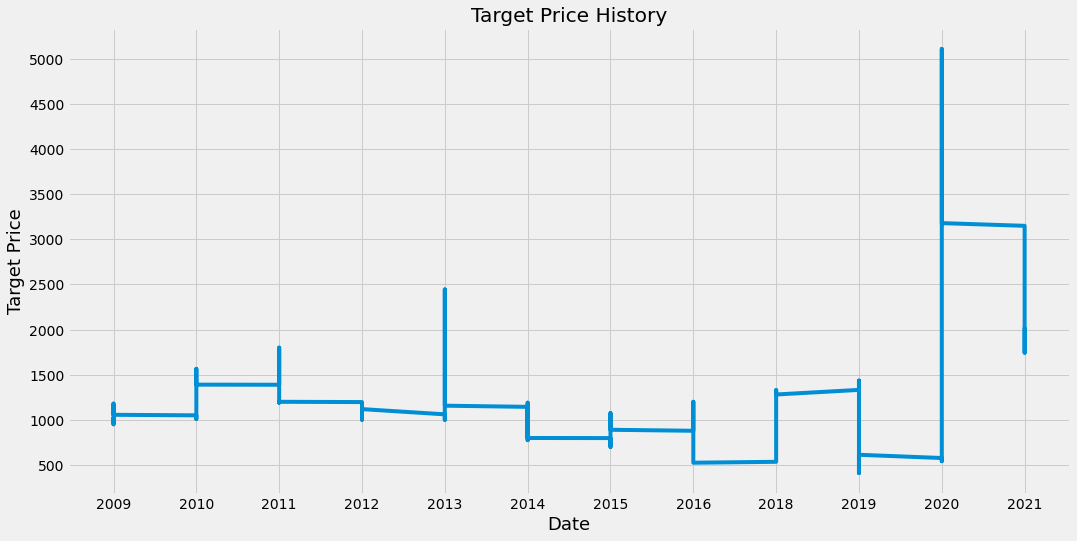

In [173]:
plt.figure(figsize=(16,8))
plt.title('Target Price History')
plt.yticks(np.arange(0, max(data['TARGET']) , 500))
plt.plot(date, data['TARGET'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Target Price',fontsize=18)
plt.show()

In [174]:
f_data=data.filter(['TARGET'])
dataset=f_data.values
training_data_len= math.ceil(len(dataset) * .8)

#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.13212766],
       [0.13085106],
       [0.13106383],
       ...,
       [0.32085106],
       [0.3306383 ],
       [0.34297872]])

In [175]:
#Create training data set

train_data=scaled_data[0:training_data_len,:]

#split the data into x_train and y_train data sets

x_train =[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:

    print(x_train)
    print(y_train)
    print()

[array([0.13212766, 0.13085106, 0.13106383, 0.13106383, 0.13106383,
       0.13148936, 0.13148936, 0.13148936, 0.13148936, 0.13170213,
       0.13595745, 0.13255319, 0.13191489, 0.13234043, 0.13255319,
       0.13297872, 0.13361702, 0.13382979, 0.13425532, 0.13978723,
       0.14042553, 0.13829787, 0.14255319, 0.14680851, 0.14765957,
       0.13489362, 0.12617021, 0.12617021, 0.12617021, 0.12574468,
       0.12595745, 0.12574468, 0.12574468, 0.12340426, 0.12234043,
       0.12510638, 0.11914894, 0.11765957, 0.12553191, 0.12531915,
       0.12425532, 0.12340426, 0.12212766, 0.12085106, 0.11914894,
       0.11914894, 0.11829787, 0.11723404, 0.11702128, 0.12531915,
       0.1212766 , 0.11744681, 0.12085106, 0.1187234 , 0.1212766 ,
       0.11914894, 0.11617021, 0.11510638, 0.12085106, 0.11808511])]
[0.12085106382978723]



In [176]:
#convert train data to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

#Reshape
x_train.shape

(1780, 60)

In [177]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1780, 60, 1)

In [178]:
# build LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [179]:
#copile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [180]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1780/1780 [==============================] - 55s 29ms/step - loss: 6.2260e-04


In [181]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len - 60:,:]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [182]:
test_data

array([[0.20595745],
       [0.21191489],
       [0.20829787],
       [0.20808511],
       [0.20212766],
       [0.18829787],
       [0.18893617],
       [0.18553191],
       [0.18468085],
       [0.18276596],
       [0.17957447],
       [0.16702128],
       [0.16659574],
       [0.15510638],
       [0.16382979],
       [0.17276596],
       [0.16617021],
       [0.17255319],
       [0.17319149],
       [0.17234043],
       [0.16212766],
       [0.16446809],
       [0.17255319],
       [0.17914894],
       [0.1806383 ],
       [0.17574468],
       [0.17425532],
       [0.17021277],
       [0.1687234 ],
       [0.00553191],
       [0.01      ],
       [0.01468085],
       [0.01382979],
       [0.01276596],
       [0.01191489],
       [0.01191489],
       [0.01468085],
       [0.01914894],
       [0.01702128],
       [0.01255319],
       [0.01170213],
       [0.01148936],
       [0.00829787],
       [0.00787234],
       [0.00744681],
       [0.00638298],
       [0.00468085],
       [0.002

In [183]:
#convert the data to a numpy array
x_test=np.array(x_test)
#reshape
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [184]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [185]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt( np.mean((predictions - y_test)**2))
rmse

693.3816410889452

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


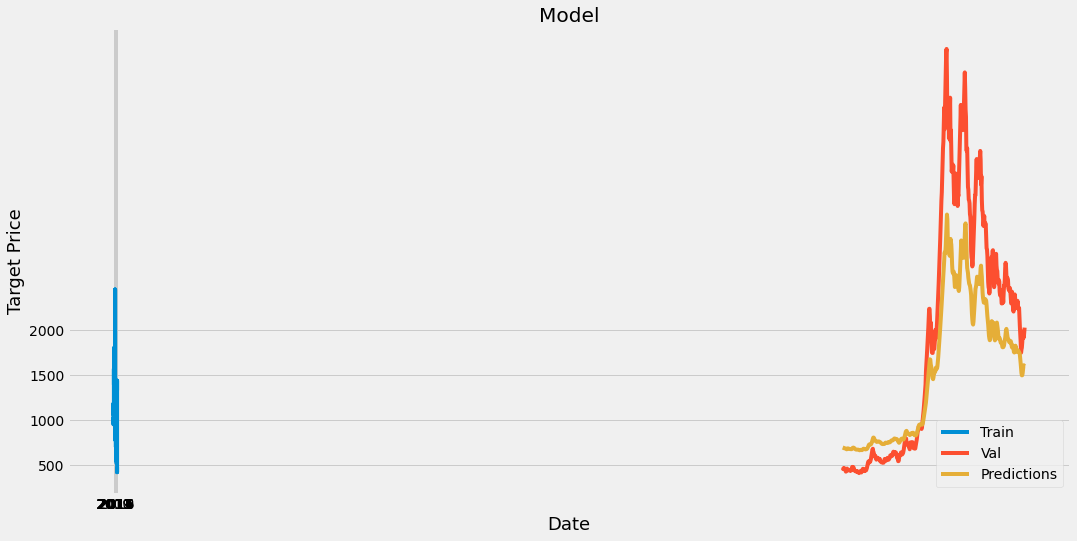

In [190]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
date = pd.to_datetime(train['Date'], format="%Y-%m-%d").dt.strftime("%Y")
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Target Price',fontsize=18)
plt.yticks(np.arange(0, max(train['TARGET']) , 500))
plt.plot(date, train['TARGET'])
plt.plot(valid[['TARGET','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [191]:
#show the valid and predicted prices
valid

,Date,HIGH,TARGET,Predictions
1840,2019-06-09,477,467,694.348877
1841,2019-06-10,467,455,692.782227
1842,2019-06-11,455,464,688.237366
1843,2019-06-12,464,462,685.922485
1844,2019-06-15,462,465,684.868103
...,...,...,...,...
2295,2021-05-30,1944,1978,1559.524170
2296,2021-05-31,1978,1907,1599.272583
2297,2021-06-01,1907,1918,1605.345337
2298,2021-06-02,1918,1964,1597.017090
